In [48]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras.preprocessing import image
 from tensorflow.keras.optimizers import RMSprop
 import tensorflow as tf
 import matplotlib.pyplot as  plt
 import cv2
 import os
 import glob as gb
 import numpy as np
 import random
 import matplotlib.image as mpimg

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
TRAIN_DIR = "/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Train"
TEST_DIR = "/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Test"

In [51]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))   
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 97 in folder Fear
For training data, found 69 in folder Happy
For training data, found 118 in folder Angry
For training data, found 151 in folder Sad
For training data, found 38 in folder Surprise


In [52]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 69 in folder Happy
For testing data, found 97 in folder Fear
For testing data, found 118 in folder Angry
For testing data, found 151 in folder Sad
For testing data, found 38 in folder Surprise


In [53]:
img = image.load_img("/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Train/Fear/Fear_1.jpg")
BATCH_SIZE=64

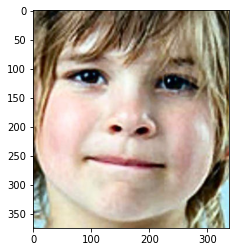

In [54]:
plt.imshow(img)

In [55]:
cv2.imread("/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Train/Fear/Fear_1.jpg").shape

(375, 337, 3)

In [56]:
cv2.imread("/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Train/Fear/Fear_1.jpg")

array([[[ 34,  50,  57],
        [ 53,  69,  76],
        [ 89, 105, 111],
        ...,
        [ 40,  65,  75],
        [ 78, 105, 115],
        [125, 153, 160]],

       [[ 46,  62,  69],
        [ 63,  79,  86],
        [ 95, 111, 117],
        ...,
        [ 35,  60,  70],
        [ 76, 103, 113],
        [125, 153, 160]],

       [[ 58,  76,  83],
        [ 72,  90,  97],
        [ 97, 115, 122],
        ...,
        [ 26,  51,  61],
        [ 71,  98, 108],
        [126, 154, 161]],

       ...,

       [[220, 220, 184],
        [227, 227, 191],
        [237, 235, 200],
        ...,
        [249, 242, 187],
        [250, 241, 184],
        [252, 241, 183]],

       [[159, 159, 129],
        [172, 172, 142],
        [192, 190, 159],
        ...,
        [249, 242, 187],
        [251, 241, 187],
        [253, 242, 185]],

       [[120, 121,  95],
        [137, 138, 112],
        [164, 161, 133],
        ...,
        [249, 242, 187],
        [252, 242, 188],
        [254, 243, 186]]

In [57]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [58]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Train/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

test_dataset = test.flow_from_directory('/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Test/',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

Found 491 images belonging to 5 classes.
Found 491 images belonging to 5 classes.


In [59]:
train_dataset.class_indices

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Surprise': 4}

In [60]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [61]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [62]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [64]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data =  test_dataset)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 5.5258 - accuracy: 0.6667

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 36s 17s/step - loss: 5.5258 - accuracy: 0.6667 - val_loss: 4.0418 - val_accuracy: 0.8000
Epoch 2/30
3/3 [==============================] - 15s 7s/step - loss: 1.9372 - accuracy: 0.6000 - val_loss: 1.2688 - val_accuracy: 0.8000
Epoch 3/30
3/3 [==============================] - 15s 7s/step - loss: 0.9367 - accuracy: 0.8000 - val_loss: 0.5086 - val_accuracy: 0.8000
Epoch 4/30
3/3 [==============================] - 16s 8s/step - loss: 0.5231 - accuracy: 0.8000 - val_loss: 0.5295 - val_accuracy: 0.8000
Epoch 5/30
3/3 [==============================] - 15s 7s/step - loss: 0.5110 - accuracy: 0.8000 - val_loss: 0.5131 - val_accuracy: 0.8000
Epoch 6/30
3/3 [==============================] - 16s 8s/step - loss: 0.5143 - accuracy: 0.8000 - val_loss: 0.5221 - val_accuracy: 0.8000
Epoch 7/30
3/3 [==============================] - 15s 7s/step - loss: 0.5160 - accuracy: 0.8000 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 8/30
3/3 [============================

In [65]:
model.evaluate(test_dataset)

164/164 [==============================] - 15s 90ms/step - loss: 0.5323 - accuracy: 0.8000


[0.5323209166526794, 0.7999988198280334]

In [66]:
def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
   
    return img

In [67]:
class_names = ['Fear','Angry', 'Happy', 'Sad', 'Surprise']

Image shape (683, 1024, 3)
Image shape (160, 240, 3)
Image shape (624, 900, 3)
Image shape (250, 179, 3)
Image shape (177, 161, 3)
Image shape (177, 161, 3)
Image shape (1300, 957, 3)
Image shape (1000, 2000, 3)
Image shape (1000, 2000, 3)
Image shape (1189, 1300, 3)
Image shape (800, 1200, 3)
Image shape (986, 1200)


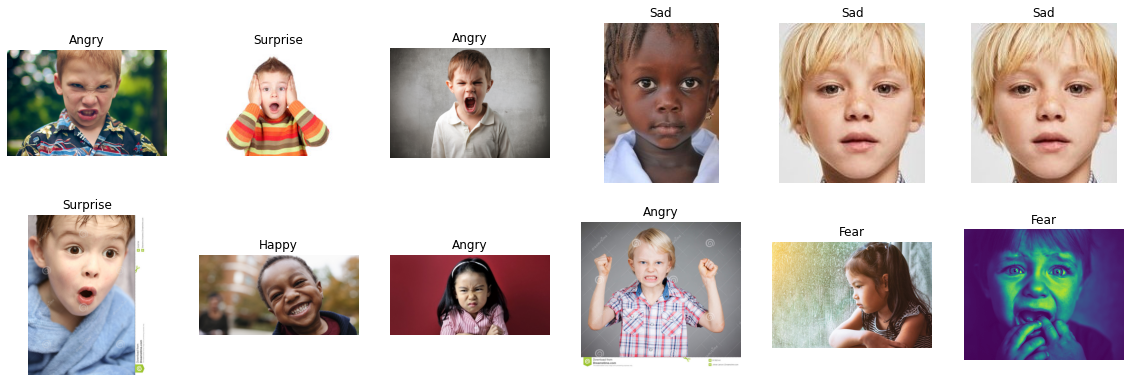

In [68]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/High_Accuracy_Emotion_Detection/Dataset/Test/", target_class=class_name)

Text(0, 0.5, 'Accuracy')

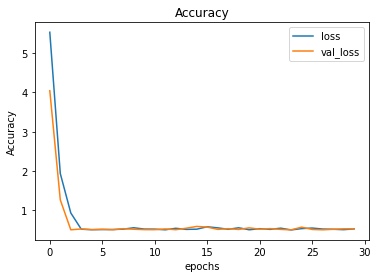

In [69]:
import pandas as pd

pd.DataFrame(model_fit.history)[['loss','val_loss']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

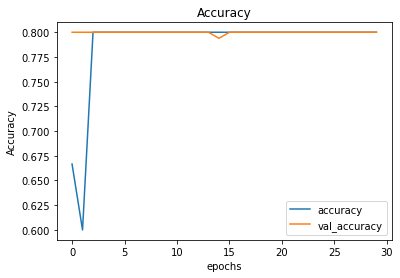

In [70]:
pd.DataFrame(model_fit.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')